In [22]:
import matplotlib.pyplot as plt
import numpy as np

import lsst.daf.butler as dB
import lsst.cp.verify.notebooks.utils as utils
import lsst.afw.display as afwDisplay

plt.rcParams['figure.figsize'] = [15, 15]

In [2]:
# Which calibration type to analyse.
calibType = 'ptc'

# This cell should be edited to match the data to be inspected.
afwDisplay.setDefaultBackend("astrowidgets")
cameraName = 'LATISS'
originalGenCollection = 'u/czw/DM-28920/ptcGen.20210722a'
originalGenCollection2 = 'u/czw/DM-28920/ptcGen.20210722b'
genCollection = 'u/czw/DM-28920/ptcGen.20210723Ya'
genCollection2 = 'u/czw/DM-28920/ptcGen.20210723Yb'

/home/czw/.local/lib/python3.8/site-packages/ginga/cmap.py:13317: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  for name in _cm.cmap_d:


In [15]:
# Get butler and camera
butler = dB.Butler("/repo/main/", collections=[genCollection, genCollection2, originalGenCollection, originalGenCollection2])
camera = butler.get('camera', instrument=cameraName)

In [20]:
# butler = dB.Butler("/repo/main/", collections=[genCollection, genCollection2, originalGenCollection, originalGenCollection2])
butler = dB.Butler("/repo/main/", collections=[genCollection])
ptcA = butler.get('ptc', instrument='LATISS', detector=0)
print(ptcA.getMetadata()['CALIBDATE'])

butler = dB.Butler("/repo/main/", collections=[genCollection2])
ptcB = butler.get('ptc', instrument='LATISS', detector=0)
print(ptcB.getMetadata()['CALIBDATE'])

butler = dB.Butler("/repo/main/", collections=[originalGenCollection])
ptcOA = butler.get('ptc', instrument='LATISS', detector=0)
print(ptcOA.getMetadata()['CALIBDATE'])

butler = dB.Butler("/repo/main/", collections=[originalGenCollection2])
ptcOB = butler.get('ptc', instrument='LATISS', detector=0)
print(ptcOB.getMetadata()['CALIBDATE'])


2021-07-23T18:56:31.347135
2021-07-23T18:46:24.047074
2021-07-21T18:43:56.918243
2021-07-21T18:54:08.293123


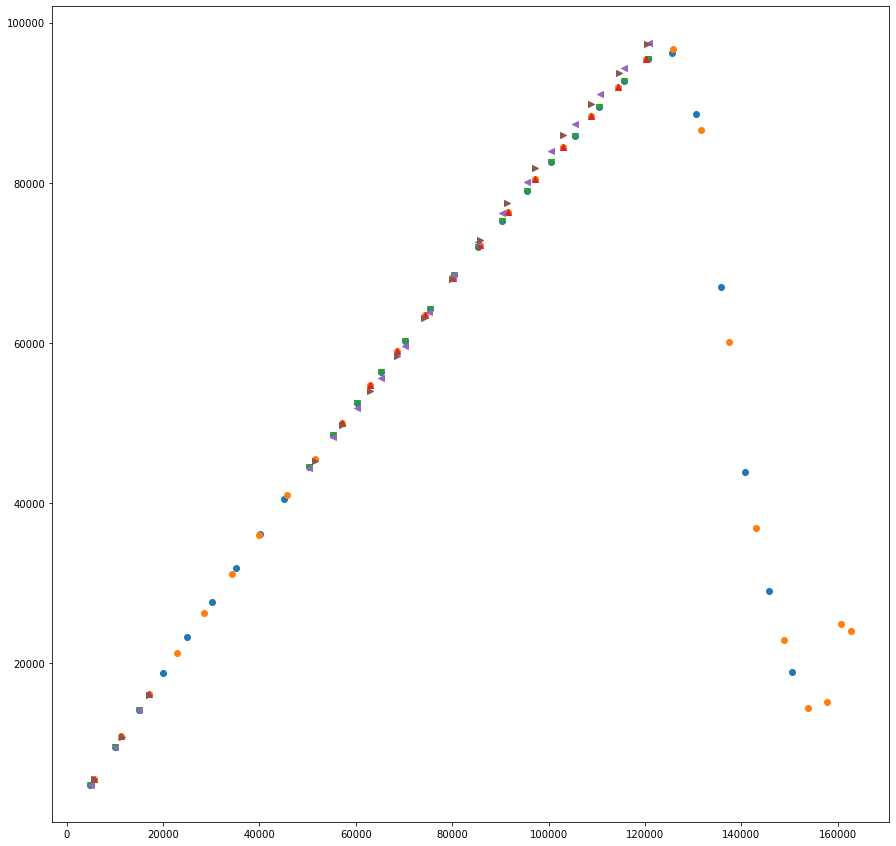

C00 Continue? [c, q]q


In [26]:
continueDisplay=True
for amp in ptcA.ampNames:
    plt.scatter(ptcA.rawMeans[amp], ptcA.rawVars[amp], marker='o', label="PTCA")
    plt.scatter(ptcB.rawMeans[amp], ptcB.rawVars[amp], marker='o', label="PTCA")

    plt.scatter(ptcA.finalMeans[amp], ptcA.finalVars[amp], marker='v', label="PTCA")
    plt.scatter(ptcB.finalMeans[amp], ptcB.finalVars[amp], marker='^', label='PTCB')
    
    plt.scatter(ptcOA.finalMeans[amp], ptcOA.finalVars[amp], marker='<', label="PTCA")
    plt.scatter(ptcOB.finalMeans[amp], ptcOB.finalVars[amp], marker='>', label='PTCB')

    plt.show()
    
    while True:
        ans = input(f"{amp} Continue? [c, q]").lower()
        if ans in ("", "c",):
            break
        if ans in ('q', 'x'):
            continueDisplay = False
            break
    if continueDisplay is False:
        break

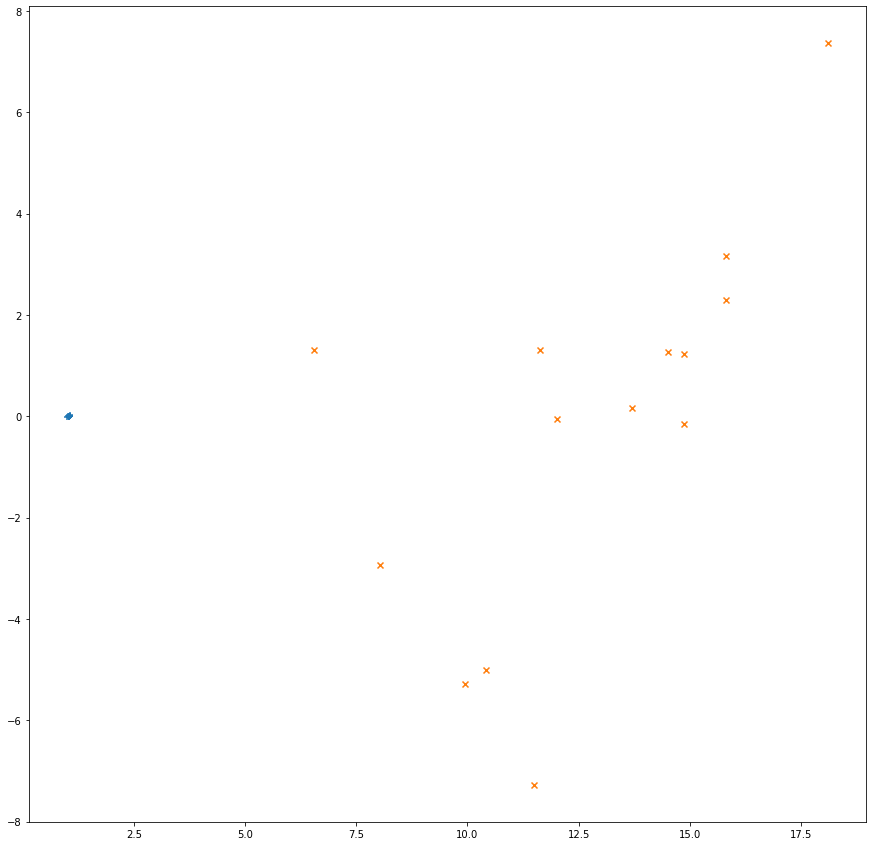

A Gain: ['1.046', '1.057', '1.054', '1.044', '0.994', '1.056', '1.058', '1.064', '1.035', '1.034', '1.027', '1.036', '1.043', '1.040', '1.062', '1.035']
A RN:   ['13.689', '14.875', '14.864', '12.021', 'nan', '14.504', '15.822', '15.811', '9.946', '11.640', '6.558', '10.415', '11.501', '8.034', '18.105', 'nan']
B Gain: ['1.042', '1.056', '1.045', '1.042', '0.999', '1.051', '1.046', '1.055', '1.047', '1.034', '1.030', '1.053', '1.059', '1.048', '1.040', '1.052']
B RN:   ['13.525', '15.027', '13.644', '12.069', 'nan', '13.232', '12.664', '13.516', '15.228', '10.328', '5.249', '15.417', '18.773', '10.962', '10.747', '13.168']


In [27]:
plt.scatter(np.array(list(ptcA.gain.values())), 
            np.array(list(ptcA.gain.values())) - np.array(list(ptcB.gain.values())), 
            marker='+', label="PTCA")
plt.scatter(np.array(list(ptcA.noise.values())), 
            np.array(list(ptcA.noise.values())) - np.array(list(ptcB.noise.values())),
            marker='x', label='PTCB')
plt.show()
print("A Gain:", [f"{x:.3f}" for x in ptcA.gain.values()])
print("A RN:  ", [f"{x:.3f}" for x in ptcA.noise.values()])

print("B Gain:", [f"{x:.3f}" for x in ptcB.gain.values()])
print("B RN:  ", [f"{x:.3f}" for x in ptcB.noise.values()])

In [7]:
ptcA.inputExpIdPairs

{'C00': [[[2021052500077, 2021052500078]],
  [[2021052500079, 2021052500080]],
  [[2021052500081, 2021052500082]],
  [[2021052500083, 2021052500084]],
  [[2021052500085, 2021052500086]],
  [[2021052500087, 2021052500088]],
  [[2021052500089, 2021052500090]],
  [[2021052500091, 2021052500092]],
  [[2021052500093, 2021052500094]],
  [[2021052500095, 2021052500096]],
  [[2021052500097, 2021052500098]],
  [[2021052500099, 2021052500100]],
  [[2021052500101, 2021052500102]],
  [[2021052500103, 2021052500104]],
  [[2021052500105, 2021052500106]],
  [[2021052500107, 2021052500108]],
  [[2021052500109, 2021052500110]],
  [[2021052500111, 2021052500112]],
  [[2021052500113, 2021052500114]],
  [[2021052500115, 2021052500116]],
  [[2021052500117, 2021052500118]],
  [[2021052500119, 2021052500120]],
  [[2021052500121, 2021052500122]],
  [[2021052500123, 2021052500124]],
  [[2021052500125, 2021052500126]],
  [[2021052500127, 2021052500128]],
  [[2021052500129, 2021052500130]],
  [[2021052500131, 20

In [8]:
ptcB.inputExpIdPairs

{'C00': [[[2021052500077, 2021052500078]],
  [[2021052500079, 2021052500080]],
  [[2021052500081, 2021052500082]],
  [[2021052500083, 2021052500084]],
  [[2021052500085, 2021052500086]],
  [[2021052500087, 2021052500088]],
  [[2021052500089, 2021052500090]],
  [[2021052500091, 2021052500092]],
  [[2021052500093, 2021052500094]],
  [[2021052500095, 2021052500096]],
  [[2021052500097, 2021052500098]],
  [[2021052500099, 2021052500100]],
  [[2021052500101, 2021052500102]],
  [[2021052500103, 2021052500104]],
  [[2021052500105, 2021052500106]],
  [[2021052500107, 2021052500108]],
  [[2021052500109, 2021052500110]],
  [[2021052500111, 2021052500112]],
  [[2021052500113, 2021052500114]],
  [[2021052500115, 2021052500116]],
  [[2021052500117, 2021052500118]],
  [[2021052500119, 2021052500120]],
  [[2021052500121, 2021052500122]],
  [[2021052500123, 2021052500124]],
  [[2021052500125, 2021052500126]],
  [[2021052500127, 2021052500128]],
  [[2021052500129, 2021052500130]],
  [[2021052500131, 20

In [9]:
ptcOA = butler.get('ptc', instrument='LATISS', detector=0, collection=originalGenCollection)
ptcOB = butler.get('ptc', instrument='LATISS', detector=0, collection=originalGenCollection2)

In [18]:
ptcOA.getMetadata().toDict()

{'OBSTYPE': 'PTC',
 'PTC_SCHEMA': 'Gen3 Photon Transfer Curve',
 'PTC_VERSION': 1.0,
 'INSTRUME': 'LATISS',
 'RAFTNAME': None,
 'SLOTNAME': None,
 'DETECTOR': None,
 'DET_NAME': None,
 'DET_SER': None,
 'FILTER': None,
 'CALIB_ID': None,
 'PTC_FIT_TYPE': 'FULLCOVARIANCE',
 'CALIBDATE': '2021-07-23T18:56:31.347135',
 'CALIB_CREATION_DATE': '2021-07-23',
 'CALIB_CREATION_TIME': '18:56:31.347135'}

In [19]:
ptcA.getMetadata().toDict()

{'OBSTYPE': 'PTC',
 'PTC_SCHEMA': 'Gen3 Photon Transfer Curve',
 'PTC_VERSION': 1.0,
 'INSTRUME': 'LATISS',
 'RAFTNAME': None,
 'SLOTNAME': None,
 'DETECTOR': None,
 'DET_NAME': None,
 'DET_SER': None,
 'FILTER': None,
 'CALIB_ID': None,
 'PTC_FIT_TYPE': 'FULLCOVARIANCE',
 'CALIBDATE': '2021-07-23T18:56:31.347135',
 'CALIB_CREATION_DATE': '2021-07-23',
 'CALIB_CREATION_TIME': '18:56:31.347135'}

In [15]:
linearizer = butler.get('linearity', instrument='LATISS', detector=0, collections='u/czw/DM-28920/linearityGen.20210721a')

In [21]:
print(ptcA.inputExpIdPairs['C00'][0], ptcB.inputExpIdPairs['C00'][0])

[[2021052500077, 2021052500078]] [[2021060800082, 2021060800083]]
